# REPORT

## Learning Algorithm

To solve this environment a version of a Deep Q-Learning Algorithm was used. As the agent explores the environment, a history of the interactions is stored, which is then randomly sampled to train the agent. Additionally the ratio of exploration/exploitation(following a policy) decays overtime to favor exploitation. (this is controlled by the epsilon hyperparameter)

Hyperparameters used:
    BUFFER_SIZE = int(1e5)  # replay buffer size
    BATCH_SIZE = 64         # minibatch size
    GAMMA = 0.999           # discount factor
    TAU = 1e-3              # for soft update of target parameters
    LR = 5e-4               # learning rate
    UPDATE_EVERY = 4        # how often to update the network

Epsilon hyperparameters:
    EPSILON_START = 0.9           #starting value of epsilon, for epsilon-greedy action selection
    EPSILON_MIN = 0.01            #minimum value of epsilon
    EPSILON_DECAY = 0.9           #epsilon decay factor
    EPSILON_DECAY_DELAY = 10      #used to delay the decay of epsilon by a given number of episodes
    AVERAGE_SCORE_SOLVED = 13.0   #average score needed (over 100 last episodes) to consider the environment as solved



In order to find the right set of hyperparameters to solve the environment in as few episodes as possible, the training loop has been run several times with the number of episodes before solve averaged. Changing the Epsilon-related hyperparameters proved to be the most effective method to improve the algorithm. Below are some of the results from experimentation:

dqn(eps_start=1.0, eps_end=0.1, eps_decay=0.995, eps_decay_delay=0) average 522.8 episodes
dqn(eps_start=1.0, eps_end=0.01, eps_decay=0.9, eps_decay_delay=0) average 357.4 episodes
dqn(eps_start=1.0, eps_end=0.01, eps_decay=0.8, eps_decay_delay=0) average 352.2 episodes
dqn(eps_start=0.9, eps_end=0.01, eps_decay=0.9, eps_decay_delay=50) average 400.2 episodes
dqn(eps_start=0.9, eps_end=0.01, eps_decay=0.9, eps_decay_delay=10) average 346.0 episodes
dqn(eps_start=0.9, eps_end=0.001, eps_decay=0.8, eps_decay_delay=10) average 395.5 episodes



In order to store/update the actor's policy model two deep neural networks were used with two fully connected hidden layers, each having 64 neurons. with input and output layers eqaling the size of the environment's state and action size. (See model.py for the implementation) 


## Plot of Rewards

Below is the plot of scores achieved by the agent during training. In this particular run the environment was solved in 351 episodes:

Episode 100	Average Score: 2.81
Episode 200	Average Score: 7.94
Episode 300	Average Score: 10.25
Episode 351	Average Score: 13.09
Environment solved in 351 episodes!	Average Score: 13.09

Run the cell below to see a plot of the scores achieved by the agent.

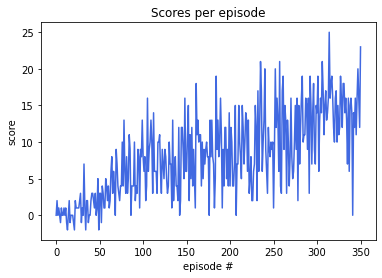

In [1]:
import matplotlib.pyplot as plt

def plot_scores(scores):
    plt.plot(scores, color='royalblue')
    plt.title('Scores per episode')
    plt.ylabel('score')
    plt.xlabel('episode #')
    plt.show()
    
scores = [0.0, 2.0, 0.0, 1.0, 0.0, -1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, -1.0, -2.0, 0.0, 2.0, -1.0, 0.0, 0.0, 0.0, -1.0, -2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, -1.0, 1.0, 0.0, 7.0, 1.0, -2.0, 2.0, 2.0, -1.0, 0.0, 0.0, 2.0, 3.0, 3.0, 2.0, 1.0, 3.0, 0.0, 1.0, 5.0, -2.0, 3.0, 3.0, -1.0, 4.0, 3.0, 1.0, 1.0, 5.0, 4.0, 2.0, 4.0, 1.0, 2.0, 6.0, 8.0, 3.0, 6.0, 4.0, 0.0, 9.0, 7.0, 4.0, 3.0, 2.0, 4.0, 4.0, 10.0, 4.0, 13.0, 6.0, 3.0, 8.0, 3.0, 5.0, 11.0, 9.0, 0.0, 4.0, 4.0, 4.0, 10.0, 2.0, 4.0, 3.0, 9.0, 8.0, 1.0, 9.0, 8.0, 13.0, 8.0, 6.0, 8.0, 2.0, 4.0, 16.0, 6.0, 9.0, 10.0, 13.0, 10.0, 3.0, 14.0, 6.0, 6.0, 6.0, 3.0, 10.0, 10.0, 11.0, 6.0, 3.0, 9.0, 7.0, 5.0, 9.0, 8.0, 5.0, 3.0, 4.0, 10.0, 7.0, 7.0, 1.0, 13.0, 2.0, 6.0, 8.0, 4.0, 4.0, 2.0, 12.0, 0.0, 2.0, 12.0, 12.0, 9.0, 5.0, 16.0, 6.0, 6.0, 11.0, 15.0, 2.0, 11.0, 5.0, 12.0, 4.0, 9.0, 5.0, 1.0, 18.0, 11.0, 13.0, 10.0, 11.0, 11.0, 4.0, 10.0, 5.0, 9.0, 7.0, 9.0, 10.0, 8.0, 8.0, 0.0, 13.0, 8.0, 13.0, 8.0, 7.0, 1.0, 5.0, 19.0, 9.0, 13.0, 8.0, 10.0, 16.0, 11.0, 1.0, 9.0, 4.0, 12.0, 12.0, 5.0, 9.0, 4.0, 14.0, 4.0, 12.0, 10.0, 4.0, 4.0, 7.0, 15.0, 0.0, 7.0, 7.0, 15.0, 10.0, 8.0, 5.0, 15.0, 12.0, 7.0, 10.0, 14.0, 13.0, 6.0, 13.0, 3.0, 5.0, 8.0, 2.0, 2.0, 6.0, 7.0, 15.0, 12.0, 2.0, 17.0, 6.0, 12.0, 21.0, 17.0, 6.0, 10.0, 13.0, 20.0, 9.0, 6.0, 3.0, 12.0, 9.0, 8.0, 10.0, 9.0, 10.0, 1.0, 9.0, 20.0, 12.0, 16.0, 13.0, 6.0, 21.0, 4.0, 3.0, 17.0, 19.0, 9.0, 15.0, 13.0, 3.0, 13.0, 10.0, 4.0, 8.0, 16.0, 8.0, 5.0, 6.0, 10.0, 15.0, 9.0, 16.0, 2.0, 15.0, 7.0, 12.0, 16.0, 19.0, 10.0, 11.0, 11.0, 16.0, 15.0, 9.0, 16.0, 3.0, 19.0, 15.0, 7.0, 14.0, 18.0, 9.0, 7.0, 15.0, 14.0, 19.0, 6.0, 13.0, 16.0, 14.0, 21.0, 17.0, 11.0, 15.0, 17.0, 13.0, 14.0, 16.0, 25.0, 16.0, 18.0, 19.0, 16.0, 12.0, 10.0, 16.0, 17.0, 10.0, 15.0, 11.0, 12.0, 19.0, 16.0, 12.0, 18.0, 18.0, 14.0, 16.0, 13.0, 7.0, 16.0, 6.0, 15.0, 16.0, 14.0, 0.0, 14.0, 12.0, 16.0, 11.0, 16.0, 20.0, 16.0, 12.0, 23.0]

plot_scores(scores)


## Ideas for Future Work

Further exploration of changing hyperparameters could potentially yield better results, such as changing the size of the replay buffer or how often to run the training loop.

Additionally implementing various improvement to the DQN, such as a double DQN, a dueling DQN, and/or prioritized experience replay could also improve the performance of the algorithm.

I've noticed during testing of the trained agent that sometimes it can get stuck not moving when the direction towards the reward is not so clear, yielding a low score for the episode. Since the current implementation exits the training loop once the goal score of 13.0 over the last 100 episodes is achieved, this issue could potentially be mitigated by running the training for a larger number of episodes beyond the goal.